# Olympic Sized Examples

In [1]:
# Extra Python functionality to import
from datascience import *  # datascience Table 
import EDS
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
user = os.getenv('JUPYTERHUB_USER')

### Data Set
Athletes: Olympic_Data/athlete_events.csv
Source: Kaggle https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
#### Data Fields
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex-MorF
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or nan

We will limit our project to data from the Winter Olympics by using the where method [.where("Season","Winter") ] which leaves us with 18,923 individual athletes and 48,564 athlete/event datapoints (Many athletes compete in multiple events and/or over multiple Olympics).  

In [3]:
datafile = "data/winter_athletes.csv"
athletes = Table.read_table(datafile).sort("Year",descending=True).where("Season","Winter")
athletes

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
16,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
126,Forough Abbasi,F,20,164,58,Iran,IRI,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Slalom,nan
145,Jeremy Abbott,M,28,175,70,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Men's Singles,nan
145,Jeremy Abbott,M,28,175,70,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Super G,nan
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Giant Slalom,nan
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Slalom,nan
532,Iason Abramashvili,M,25,176,82,Georgia,GEO,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Giant Slalom,nan
532,Iason Abramashvili,M,25,176,82,Georgia,GEO,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,nan
534,Oleksandr Volodymyrovych Abramenko,M,25,180,82,Ukraine,UKR,2014 Winter,2014,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Men's Aerials,nan


### Summary Statistics

In [4]:
def two_num_sum(table,column):
    nums=[]
    array = table.column(column)
    nums.append(np.mean(array))
    nums.append(np.std(array))
    print(f'mean: {nums[0]:.2f} \nstandard deviation: {nums[1]:.2f} \n')
    return nums

In [5]:
stats = two_num_sum(athletes.where("Age",are.below(90)),"Age")
stats

mean: 25.04 
standard deviation: 4.78 



[25.039147455415399, 4.7776857171359515]

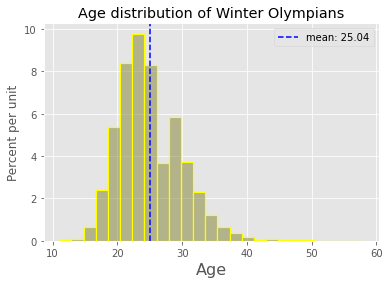

In [6]:
athletes.where("Age",are.below(90)).hist("Age", bins=25, fc=(.5, .5, .2, 0.5), edgecolor='yellow', linewidth=1.2)
mean_label = 'mean: '+str(round(stats[0],2))
plt.axvline(x=stats[0], color='b', ls='--',label=mean_label)
plt.title("Age distribution of Winter Olympians")
plt.legend()
plt.show()

### Plotting

In [7]:
France = athletes.where("Team","France").group("Year")

In [8]:
Swiss = athletes.where("Team","Switzerland").group("Year")

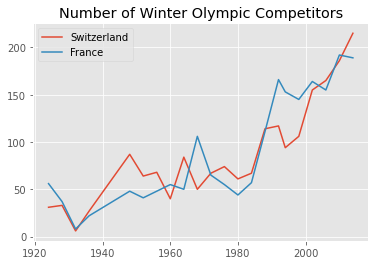

In [9]:
plt.plot(Swiss['Year'],Swiss['count'], label = "Switzerland")
plt.plot(France['Year'],France['count'], label = "France")
plt.title("Number of Winter Olympic Competitors")
plt.legend()
plt.show()

### Time trends

In [10]:
athletes.group(["Year","Event"])

Year,Event,count
1924,Alpinism Mixed Alpinism,21
1924,Bobsleigh Men's Four/Five,39
1924,Cross Country Skiing Men's 18 kilometres,41
1924,Cross Country Skiing Men's 50 kilometres,33
1924,Curling Men's Curling,16
1924,Figure Skating Men's Singles,11
1924,Figure Skating Mixed Pairs,18
1924,Figure Skating Women's Singles,8
1924,Ice Hockey Men's Ice Hockey,82
1924,Military Ski Patrol Men's Military Ski Patrol,24


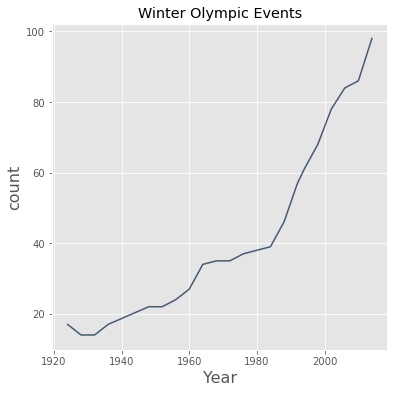

In [12]:
athletes.group(["Year","Event"]).group("Year").plot("Year","count")
plt.title("Winter Olympic Events")
plt.show()